In [54]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
class ReLU_network():
    def __init__(self, x,y, layerDimensions):
        self.parameters = {} #Creating a Python Dictonary to Hold Weight and Bias Parameters.
        self.L = len(layerDimensions)  #Number of Layers in the Network.
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = np.random.randn(layerDimensions[l], layerDimensions[l-1])
            self.parameters['b' + str(l)] = np.random.randn(layerDimensions[l], 1)
        self.A = {}
        self.Z = {}
        self.y = y
        self.x = x
        self.m = len(x)
        self.Z['Z0'] = x
        self.deltas = {}
        
            
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def Feedforward(self, X):
        self.A['A0'] = X
        for l in range(1, self.L):
            self.Count = l
            self.Z['Z' + str(l)] = np.dot(self.A['A' + str(l-1)], self.parameters['W' + str(l)].T ) + self.parameters['b' + str(l)].T
            self.A['A' + str(l)] = self.ReLU(self.Z['Z' + str(l)])
        self.A['A' + str(self.L -1)] = 1/(1 + np.exp(-self.Z['Z' + str(self.L -1)]))
        return self.A['A' + str(self.L - 1)]
        
    
    def dReLU(self, Z):
        return 1.* (Z>0)
    
    def costFunction(self):
        self.A['A0'] = self.x
        self.A['A'+ str(self.L-1)] = self.Feedforward(self.x)
        Cost = (-1/self.m) * np.sum( np.multiply(self.y, np.log(self.A['A'+ str(self.L-1)])) + np.multiply(1- self.y, np.log(1 - self.A['A'+ str(self.L-1)])))
        return Cost
    
    
    
    def deltaCost(self):
        L = self.L
        
        self.A['A'+ str(L-1)] = self.Feedforward(self.x)
        self.deltas['delta' + str(L-1)] = self.y - self.A['A'+ str(self.L-1)]
        
        for l in range(L-1, 0, -1):
            self.deltas['dW' + str(l)] = (1/self.m) * np.dot(self.A['A' + str(l-1)].T, self.deltas["delta" + str(l)])
            self.deltas['db' + str(l)] = np.sum(self.deltas["delta" + str(l)])/m 
            
            self.deltas["delta" + str(l-1)] = np.dot(self.deltas["delta" + str(L-1)], self.x)
        return self.deltas
    
    def UpdateParameters(self):
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = self.parameters['W' + str(l)] - (alpha * self.deltas['dW' + str(l)]).T
            self.parameters['b' + str(l)] = self.parameters['b' + str(l)] - (alpha * self.deltas['db' + str(l)]).T
        

               

In [56]:
def GenerateTestData(Size):
    x1 = np.linspace(-np.pi, (np.pi*5), Size).reshape(Size, 1)
    x2 = np.linspace(np.pi, (-np.pi*5), Size).reshape(Size, 1)
    y = np.sin(x1) + np.cos(x2+5)
    x = np.concatenate((x1,x2), axis=1)
    return x, y

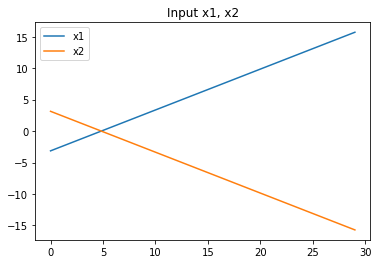

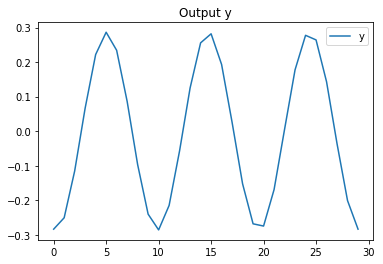

In [57]:
x,y = GenerateTestData(30)
plot(x)
title("Input x1, x2")
legend(['x1', 'x2'])
figure()
title("Output y")
plot(y)
legend(['y'])

In [58]:
NN = ReLU_network(x, y, [2,5,5,3,4,1])

"""
This means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.
"""


'\nThis means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.\n'

In [59]:
# This is how you access dictionary parameters:
# NN.parameters[W1]

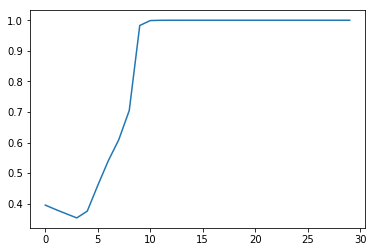

In [60]:

Output = NN.Feedforward(x)
plot(Output)

In [61]:
cost = NN.costFunction()
cost

C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


inf

In [62]:
delta = NN.deltaCost()

Final Cost = 13.747143862904869


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


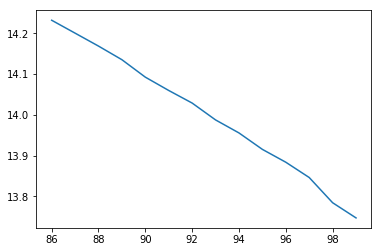

In [63]:
NumOfIterations = 100
alpha = 0.0000001
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas = NN.deltaCost()
    NN.UpdateParameters()
    Output_New = NN.Feedforward(x)
    CostTracker[i] = NN.costFunction()

plot(CostTracker)
print("Final Cost = " + str(CostTracker[NumOfIterations-1]))

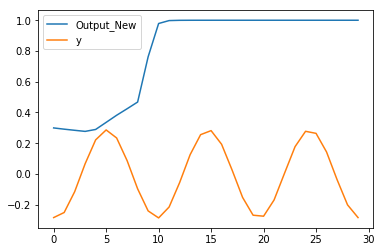

In [64]:
plot(Output_New)
plot(y)
legend(['Output_New', 'y'])

In [68]:
NN.A

{'A0': array([[ -3.14159265,   3.14159265],
        [ -2.49160797,   2.49160797],
        [ -1.84162328,   1.84162328],
        [ -1.19163859,   1.19163859],
        [ -0.54165391,   0.54165391],
        [  0.10833078,  -0.10833078],
        [  0.75831547,  -0.75831547],
        [  1.40830016,  -1.40830016],
        [  2.05828484,  -2.05828484],
        [  2.70826953,  -2.70826953],
        [  3.35825422,  -3.35825422],
        [  4.0082389 ,  -4.0082389 ],
        [  4.65822359,  -4.65822359],
        [  5.30820828,  -5.30820828],
        [  5.95819296,  -5.95819296],
        [  6.60817765,  -6.60817765],
        [  7.25816234,  -7.25816234],
        [  7.90814702,  -7.90814702],
        [  8.55813171,  -8.55813171],
        [  9.2081164 ,  -9.2081164 ],
        [  9.85810109,  -9.85810109],
        [ 10.50808577, -10.50808577],
        [ 11.15807046, -11.15807046],
        [ 11.80805515, -11.80805515],
        [ 12.45803983, -12.45803983],
        [ 13.10802452, -13.10802452],
      